###Importing Libraries

In [1]:
from google.colab import files
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns
from scipy.stats import randint, ttest_ind, chi2_contingency
from scipy import stats
import scipy.stats as stats

##Importing Data

In [2]:
uploaded_files = files.upload()

Saving Transaction_ID.csv to Transaction_ID.csv
Saving Customer_ID.csv to Customer_ID.csv
Saving City.csv to City.csv
Saving Cab_Data.csv to Cab_Data.csv


##Cab Data

In [3]:
cab_df = pd.read_csv("Cab_Data.csv")
cab_df.head(3)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632

In [4]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


### Date of Travel datatype is changing

In [5]:
# Ensure the column is treated as integers
cab_df['Date of Travel'] = cab_df['Date of Travel'].astype(int)

# Perform the necessary subtraction
cab_df['Date of Travel'] = cab_df['Date of Travel'] - 2

# Convert the resulting integers to datetime
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], unit='D', origin='1899-12-30')

# Display the DataFrame to verify the changes
print(cab_df)


        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-06    Pink Cab     ATLANTA GA   
1             10000012     2016-01-04    Pink Cab     ATLANTA GA   
2             10000013     2015-12-31    Pink Cab     ATLANTA GA   
3             10000014     2016-01-05    Pink Cab     ATLANTA GA   
4             10000015     2016-01-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-06  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-02  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-03  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-03  Yellow Cab  WASHINGTON DC   
359391        10440107     2017-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04       

In [6]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [7]:
unique_cities = cab_df['City'].unique()

print(unique_cities)

len(unique_cities)

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


19

In [8]:
cab_df.describe()

Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-15 01:37:55.042293760      22.567254   
min      1.000001e+07            2015-12-31 00:00:00       1.900000   
25%      1.011081e+07            2016-11-21 00:00:00      12.000000   
50%      1.022104e+07            2017-09-08 00:00:00      22.440000   
75%      1.033094e+07            2018-05-10 00:00:00      32.960000   
max      1.044011e+07            2018-12-29 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip  
count  359392.000000  359392.000000  
mean      423.443311     286.190113  
min        15.600000      19.000000  
25%       206.437500     151.200000  
50%       386.360000     282.480000  
75%       583.660000     413.683200  
max      2048.030000     691.200000  
std       274.378911     157.993661

##City Data
##Transaction Data
##Customer Data

In [9]:
city_df = pd.read_csv("City.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")
customer_df = pd.read_csv("Customer_ID.csv")

In [10]:
city_df_copy = city_df
transaction_df_copy = transaction_df
customer_df_copy = customer_df
cab_df_copy=cab_df

In [11]:
city_df

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [12]:
transaction_df

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

In [13]:
customer_df

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

##Data Merge

In [14]:
## Merging transaction dataset and customer dataset basing customer_id column
trans_customer_df = pd.merge(transaction_df, customer_df, on='Customer ID')
trans_customer_df

Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
440093        10439799        12490         Cash    Male   33   
440094        10439820        14971         Card    Male   30   
440095        10439838        41414         Card    Male   38   
440096        10439840        41677         Cash    Male   23   
440097        10439846        39761         Card  Female   32   

        Income (USD/Month)  
0                    10813  
1                    10813  
2                    10813  
3                     9237  
4                     9237  
...                    ...  
440093               18713  
440094               15346  
440095                3960  
440096               19454  
440097               10128  

[440098 rows x 6 columns]

In [15]:
## Merging cab dataset and trans_customer_dataset basing on Transaction_Id

cab_trans_customer_df = pd.merge(cab_df, trans_customer_df, on='Transaction ID')
cab_trans_customer_df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-06    Pink Cab     ATLANTA GA   
1             10000012     2016-01-04    Pink Cab     ATLANTA GA   
2             10000013     2015-12-31    Pink Cab     ATLANTA GA   
3             10000014     2016-01-05    Pink Cab     ATLANTA GA   
4             10000015     2016-01-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-06  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-02  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-03  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-03  Yellow Cab  WASHINGTON DC   
359391        10440107     2017-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62         358.52      334.8540        27703         Card   
2               9.04         125.20       97.6320        28712         Cash   
3              33.17         377.40      351.6020        28020         Cash   
4               8.73         114.62       97.7760        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month)  
0        Male   28               10813  
1        Male   27                9237  
2        Male   53               11242  
3        Male   23               23327  
4        Male   33                8536  
...       ...  ...                 ...  
359387   Male   24               15651  
359388   Male   32                6528  
359389   Male   56                7966  
359390   Male   32                6423  
359391   Male   20               11284  

[359392 rows x 12 columns]

In [16]:
## Merging city dataset and cab_trans_customer_df basing on city col

cab_trans_customer_city_df = pd.merge(cab_trans_customer_df, city_df, on='City')
cab_trans_customer_city_df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-06    Pink Cab     ATLANTA GA   
1             10000012     2016-01-04    Pink Cab     ATLANTA GA   
2             10000013     2015-12-31    Pink Cab     ATLANTA GA   
3             10000014     2016-01-05    Pink Cab     ATLANTA GA   
4             10000015     2016-01-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-06  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-02  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-03  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-03  Yellow Cab  WASHINGTON DC   
359391        10440107     2017-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62         358.52      334.8540        27703         Card   
2               9.04         125.20       97.6320        28712         Cash   
3              33.17         377.40      351.6020        28020         Cash   
4               8.73         114.62       97.7760        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month) Population      Users  
0        Male   28               10813   814,885     24,701   
1        Male   27                9237   814,885     24,701   
2        Male   53               11242   814,885     24,701   
3        Male   23               23327   814,885     24,701   
4        Male   33                8536   814,885     24,701   
...       ...  ...                 ...        ...        ...  
359387   Male   24               15651   418,859    127,001   
359388   Male   32                6528   418,859    127,001   
359389   Male   56                7966   418,859    127,001   
359390   Male   32                6423   418,859    127,001   
359391   Male   20               11284   418,859    127,001   

[359392 rows x 14 columns]

In [17]:
cab_trans_customer_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

##Changing Population and Users data type from Object to Int

In [18]:
def convert_int(x):
    return int(x.replace(',', ''))

In [19]:
cab_trans_customer_city_df['Population'] = cab_trans_customer_city_df['Population'].apply(lambda x: convert_int(x))
cab_trans_customer_city_df['Users'] = cab_trans_customer_city_df['Users'].apply(lambda x: convert_int(x))
cab_trans_customer_city_df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-06    Pink Cab     ATLANTA GA   
1             10000012     2016-01-04    Pink Cab     ATLANTA GA   
2             10000013     2015-12-31    Pink Cab     ATLANTA GA   
3             10000014     2016-01-05    Pink Cab     ATLANTA GA   
4             10000015     2016-01-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-06  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-02  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-03  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-03  Yellow Cab  WASHINGTON DC   
359391        10440107     2017-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62         358.52      334.8540        27703         Card   
2               9.04         125.20       97.6320        28712         Cash   
3              33.17         377.40      351.6020        28020         Cash   
4               8.73         114.62       97.7760        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month)  Population   Users  
0        Male   28               10813      814885   24701  
1        Male   27                9237      814885   24701  
2        Male   53               11242      814885   24701  
3        Male   23               23327      814885   24701  
4        Male   33                8536      814885   24701  
...       ...  ...                 ...         ...     ...  
359387   Male   24               15651      418859  127001  
359388   Male   32                6528      418859  127001  
359389   Male   56                7966      418859  127001  
359390   Male   32                6423      418859  127001  
359391   Male   20               11284      418859  127001  

[359392 rows x 14 columns]

In [20]:
##calculating the profit and modifying the travel date column to a year, month, and day. so that we can analysis more

cab_trans_customer_city_df['Profit'] = cab_trans_customer_city_df['Price Charged'] - cab_trans_customer_city_df['Cost of Trip']
cab_trans_customer_city_df['Year'] = cab_trans_customer_city_df['Date of Travel'].dt.year
cab_trans_customer_city_df['Month'] = cab_trans_customer_city_df['Date of Travel'].dt.month
cab_trans_customer_city_df['Day'] = cab_trans_customer_city_df['Date of Travel'].dt.day

In [21]:
cab_trans_customer_city_df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-06    Pink Cab     ATLANTA GA   
1             10000012     2016-01-04    Pink Cab     ATLANTA GA   
2             10000013     2015-12-31    Pink Cab     ATLANTA GA   
3             10000014     2016-01-05    Pink Cab     ATLANTA GA   
4             10000015     2016-01-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-06  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-02  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-03  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-03  Yellow Cab  WASHINGTON DC   
359391        10440107     2017-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62         358.52      334.8540        27703         Card   
2               9.04         125.20       97.6320        28712         Cash   
3              33.17         377.40      351.6020        28020         Cash   
4               8.73         114.62       97.7760        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month)  Population   Users   Profit  Year  \
0        Male   28               10813      814885   24701  57.3150  2016   
1        Male   27                9237      814885   24701  23.6660  2016   
2        Male   53               11242      814885   24701  27.5680  2015   
3        Male   23               23327      814885   24701  25.7980  2016   
4        Male   33                8536      814885   24701  16.8440  2016   
...       ...  ...                 ...         ...     ...      ...   ...   
359387   Male   24               15651      418859  127001   5.8800  2018   
359388   Male   32                6528      418859  127001   6.9020  2018   
359389   Male   56                7966      418859  127001  87.4200  2018   
359390   Male   32                6423      418859  127001  32.1420  2018   
359391   Male   20               11284      418859  127001  13.9608  2017   

        Month  Day  
0           1    6  
1           1    4  
2          12   31  
3           1    5  
4           1    1  
...       ...  ...  
359387      1    6  
359388      1    2  
359389      1    3  
359390      1    3  
359391     12   31  

[359392 rows x 18 columns]

## Diving to Exploratory Data Analysis

In [22]:
cab_trans_customer_city_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
Year                  0
Month                 0
Day                   0
dtype: int64

In [23]:
cab_trans_customer_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [24]:
cab_trans_customer_city_df.describe()

Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-15 01:37:55.042294016      22.567254   
min      1.000001e+07            2015-12-31 00:00:00       1.900000   
25%      1.011081e+07            2016-11-21 00:00:00      12.000000   
50%      1.022104e+07            2017-09-08 00:00:00      22.440000   
75%      1.033094e+07            2018-05-10 00:00:00      32.960000   
max      1.044011e+07            2018-12-29 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.000000   
50%       386.360000     282.480000    7459.000000      33.000000   
75%       583.660000     413.683200   36078.000000      42.000000   
max      2048.030000     691.200000   60000.000000      65.000000   
std       274.378911     157.993661   21012.412463      12.594234   

       Income (USD/Month)    Population          Users         Profit  \
count       359392.000000  3.593920e+05  359392.000000  359392.000000   
mean         15048.822937  3.132198e+06  158365.582267     137.253198   
min           2000.000000  2.489680e+05    3643.000000    -220.060000   
25%           8424.000000  6.712380e+05   80021.000000      28.012000   
50%          14685.000000  1.595037e+06  144132.000000      81.962000   
75%          21035.000000  8.405837e+06  302149.000000     190.030000   
max          35000.000000  8.405837e+06  302149.000000    1463.966000   
std           7969.409482  3.315194e+06  100850.051020     160.311840   

                Year          Month            Day  
count  359392.000000  359392.000000  359392.000000  
mean     2017.039136       7.508303      15.605918  
min      2015.000000       1.000000       1.000000  
25%      2016.000000       5.000000       8.000000  
50%      2017.000000       8.000000      15.000000  
75%      2018.000000      10.000000      23.000000  
max      2018.000000      12.000000      31.000000  
std         0.802047       3.424790       8.853176

## Understanding the Numerical data
#### KM Trvalled, Price Charged, Cost of Trip, Age, Income, Population, Users, and Profit.

##One-Hot Encoding

<Axes: >

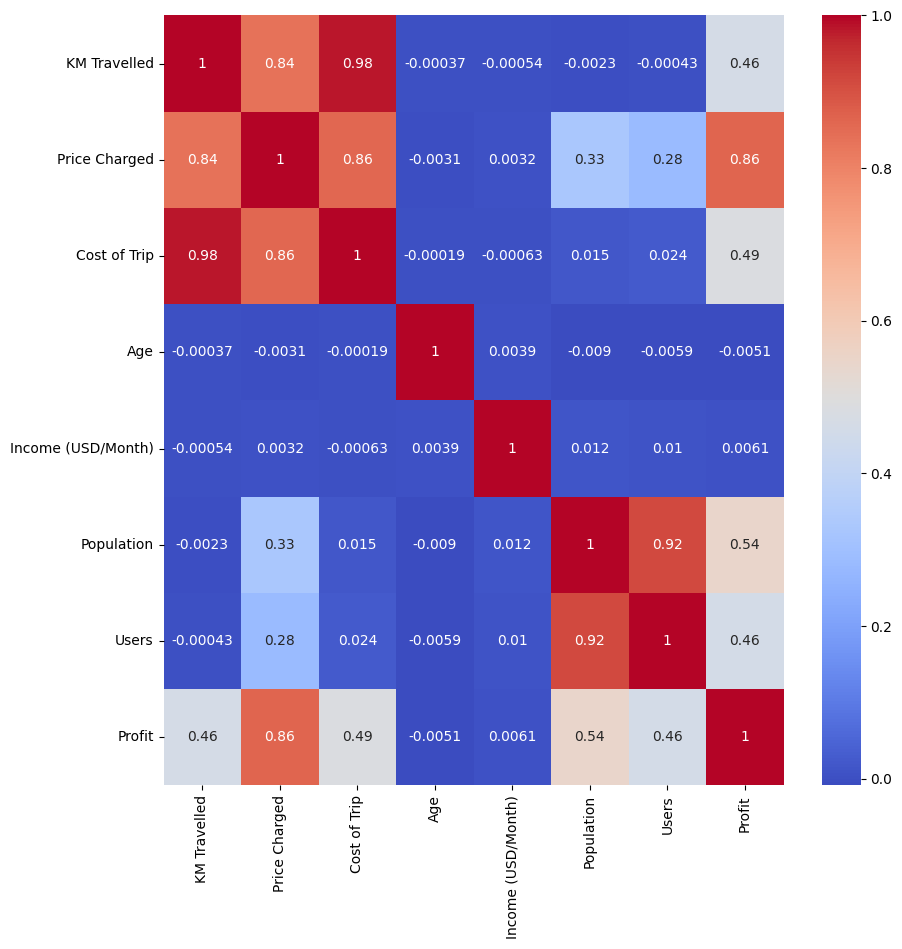

In [25]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cab_trans_customer_city_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit']].corr(), annot=True, cmap="coolwarm", ax=ax)

## Conclusion:

#####1. The heatmap shows that KM Travelled is very much related to Cost of Trip and Price Charged
#####2. Strong correlation between Population and Users as well which is very obvious.

## Pair Plot

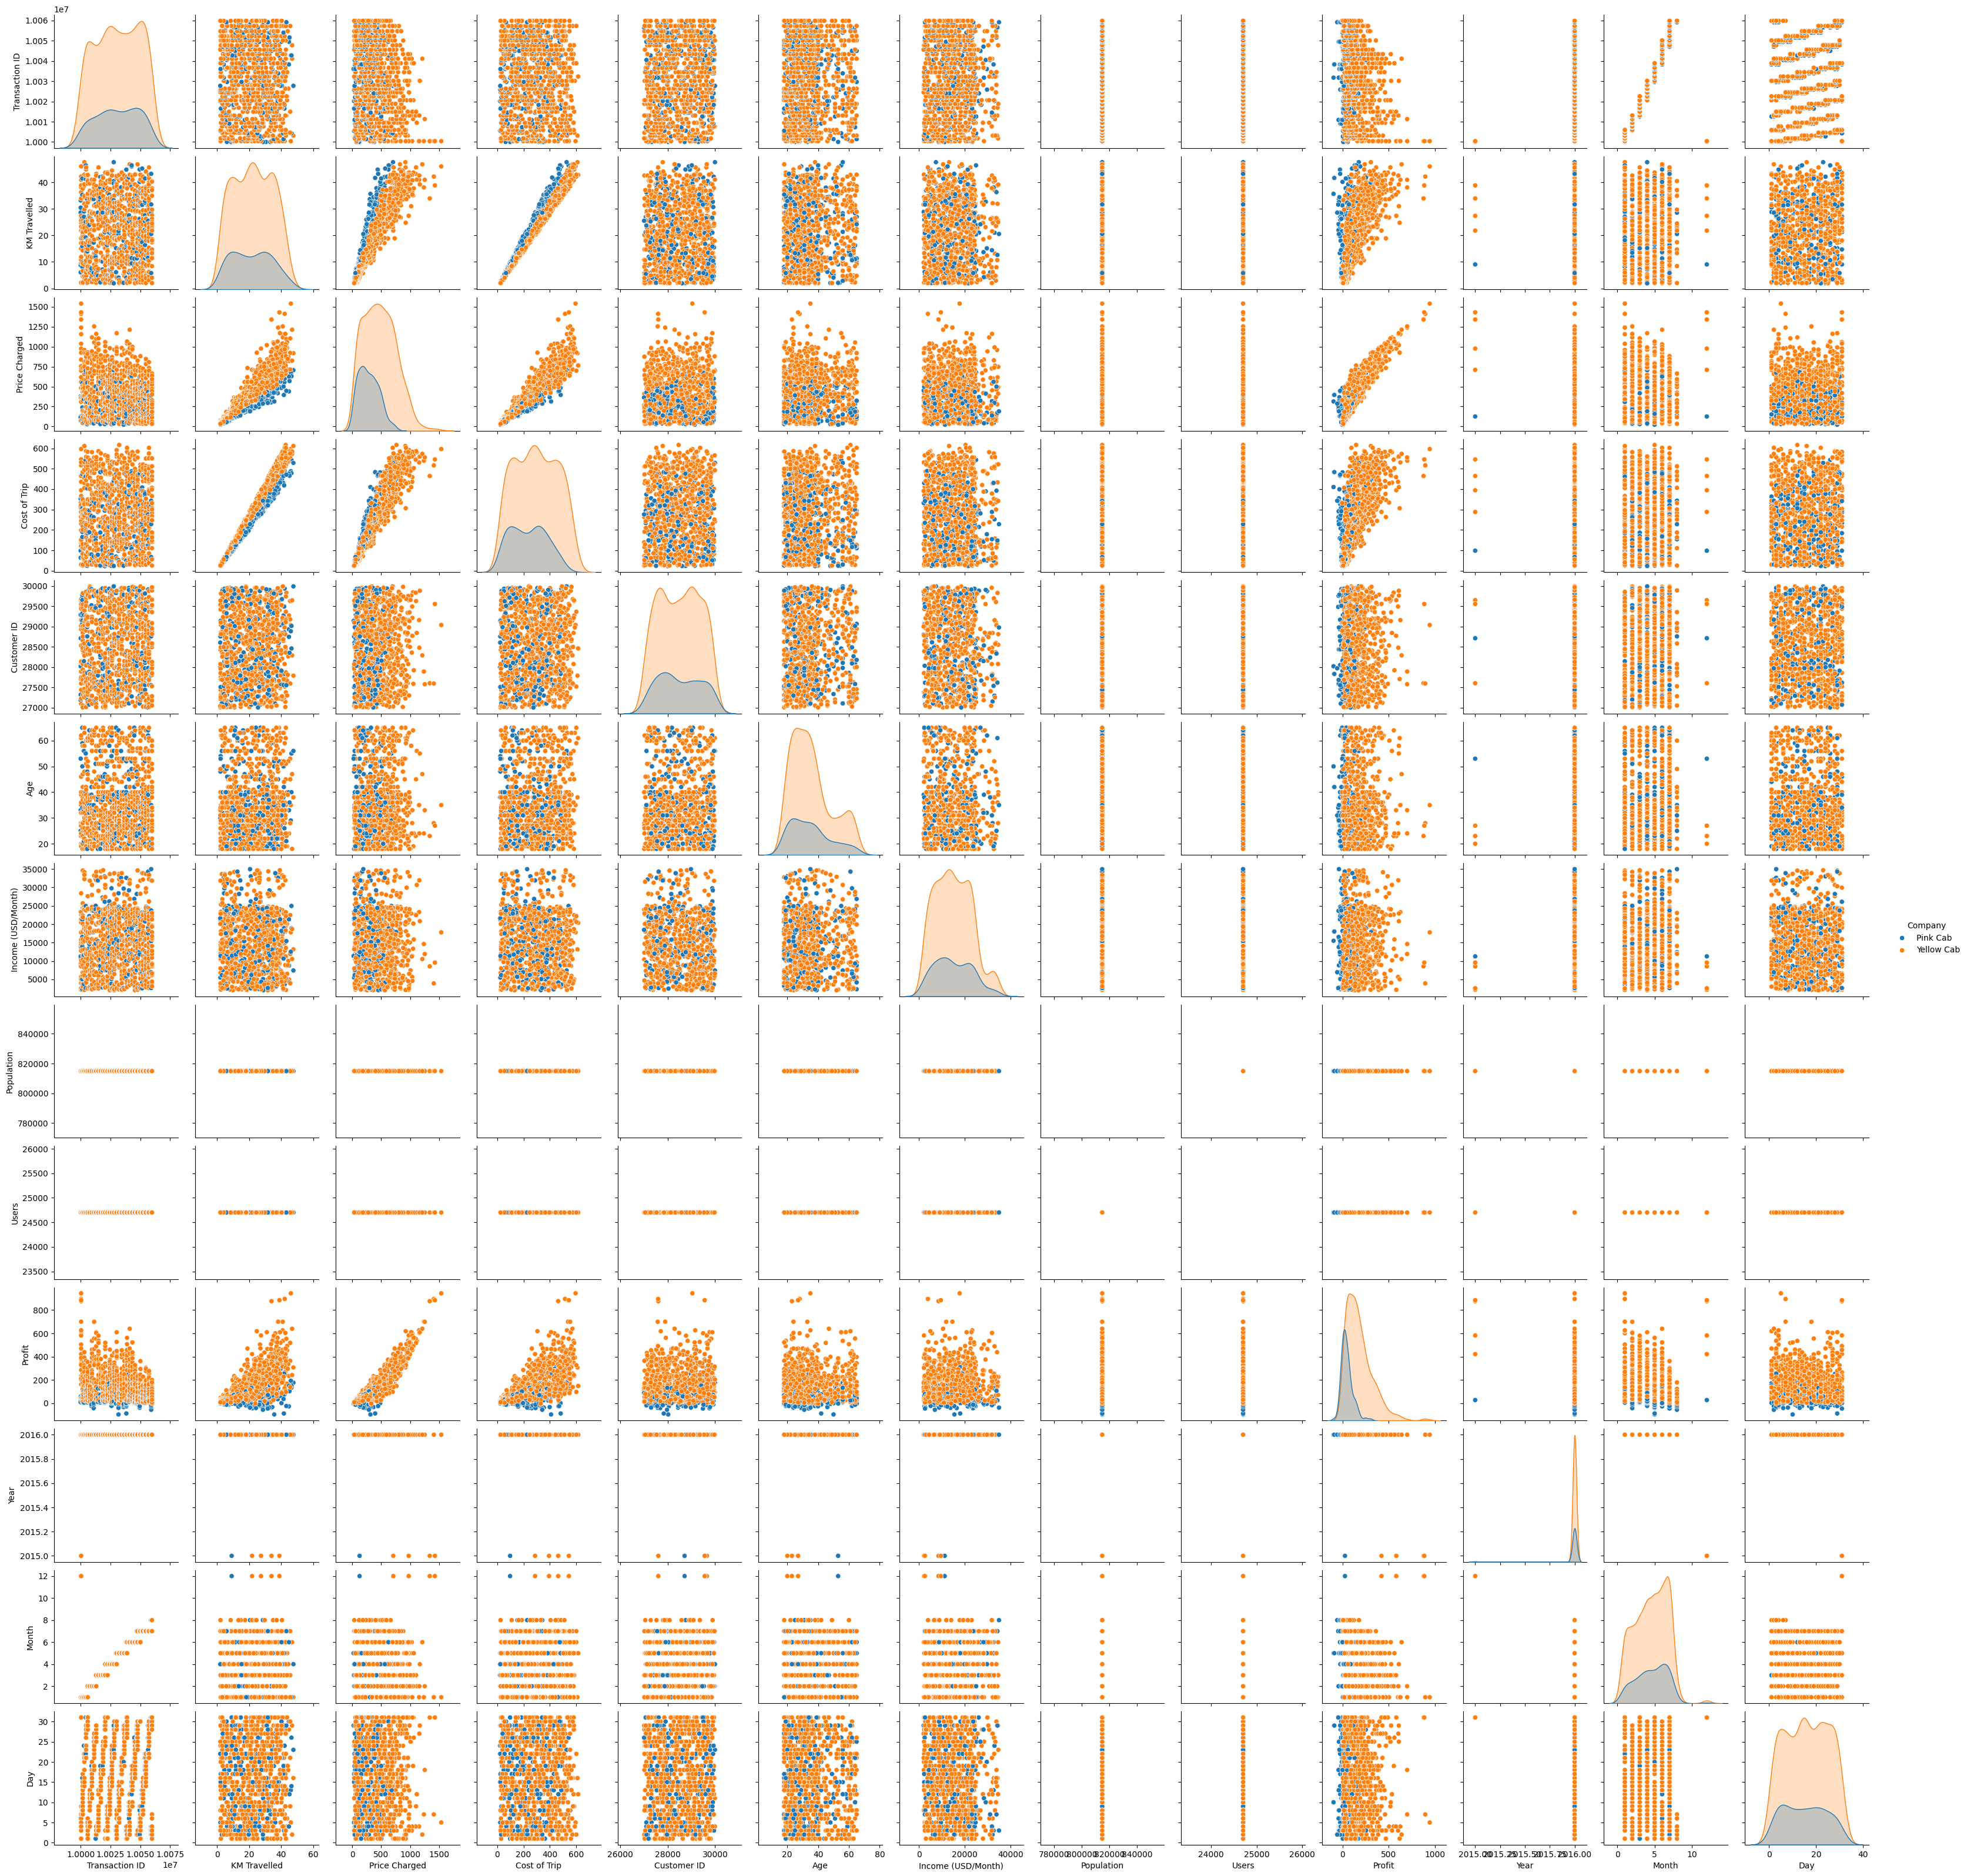

In [26]:
##pair plot to the whole dataset
sns.pairplot(cab_trans_customer_city_df.head(1000), hue = 'Company')

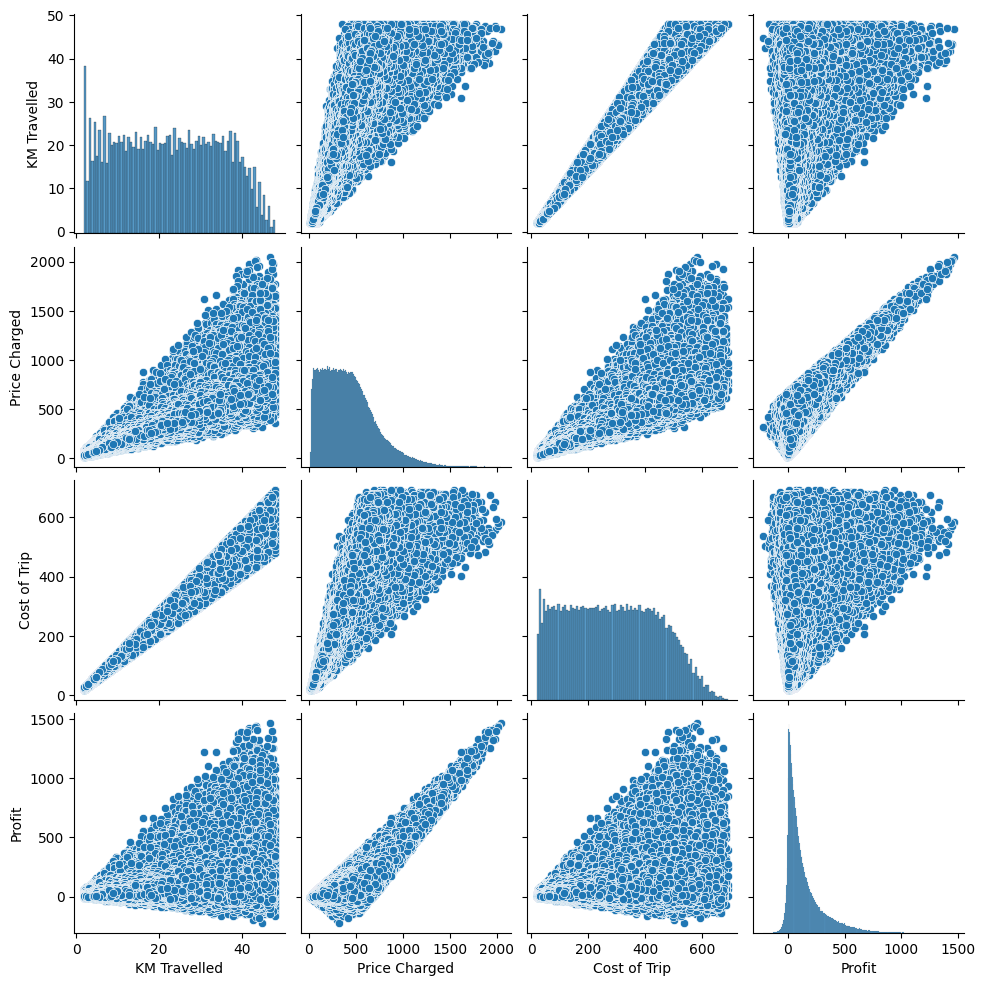

In [27]:
## pair plot to the variable which are correlated

sns.pairplot(data=cab_trans_customer_city_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']])
plt.show()


##KM Travelled vs. Other Variables:

####1.Price Charged: There is a positive linear relationship between KM Travelled and Price Charged. As the distance increases, the price charged also increases.
####2. Cost of Trip: Similarly, there is a positive linear relationship between KM Travelled and Cost of Trip.
####3. Profit: There is a positive relationship between KM Travelled and Profit. However, the relationship is not perfectly linear, indicating some variability in profit for a given distance traveled.

##Price Charged vs. Other Variables:

####1. KM Travelled: Positive linear relationship as noted.
####2. Cost of Trip: There is a strong positive linear relationship between Price Charged and Cost of Trip.
####3. Profit: Positive relationship, indicating that higher prices charged generally lead to higher profits.

##Cost of Trip vs. Other Variables:

####1. KM Travelled: Positive linear relationship as noted.
####2. Price Charged: Strong positive linear relationship.
####3. Profit: Positive relationship, but with more variability compared to Price Charged.

##Profit vs. Other Variables:

####1. KM Travelled: Positive relationship as noted.
####2. Price Charged: Positive relationship.
####3. Cost of Trip: Positive relationship.

## Understanding Categorical data
##### Company, City, Payment mode, Gender.

In [28]:
categorical_col = ['Company', 'City', 'Payment_Mode', 'Gender']

# Create a dictionary to store the results
summary = {}

for name in categorical_col:
    value_counts = cab_trans_customer_city_df[name].value_counts()
    total_count = cab_trans_customer_city_df[name].count()
    summary[name] = {'Total': total_count, 'Value Counts': value_counts}

# Print the summary in a structured format
for name, stats in summary.items():
    print(f"\n________________ {name} ________________")
    print(f"TOTAL: {stats['Total']}")
    print(stats['Value Counts'].to_frame(name='Count'))
    print("_________________________________________")



________________ Company ________________
TOTAL: 359392
             Count
Company           
Yellow Cab  274681
Pink Cab     84711
_________________________________________

________________ City ________________
TOTAL: 359392
                Count
City                 
NEW YORK NY     99885
CHICAGO IL      56625
LOS ANGELES CA  48033
WASHINGTON DC   43737
BOSTON MA       29692
SAN DIEGO CA    20488
SILICON VALLEY   8519
SEATTLE WA       7997
ATLANTA GA       7557
DALLAS TX        7017
MIAMI FL         6454
AUSTIN TX        4896
ORANGE COUNTY    3982
DENVER CO        3825
NASHVILLE TN     3010
SACRAMENTO CA    2367
PHOENIX AZ       2064
TUCSON AZ        1931
PITTSBURGH PA    1313
_________________________________________

________________ Payment_Mode ________________
TOTAL: 359392
               Count
Payment_Mode        
Card          215504
Cash          143888
_________________________________________

________________ Gender ________________
TOTAL: 359392
         Count
Gender  

## Conclusion

####1. Yellow Cab is the dominant player, accounting for roughly 76.4% of the total trips, whereas Pink Cab accounts for 23.6%.
####2. New York, NY, has the highest number of trips (99,885), followed by Chicago, IL (56,625), and Los Angeles, CA (48,033). These three cities together account for approximately 56% of the total trips.
####3. Card-payments - 60% of total trips  and
#### Cash-payments - 40% of total trips

## Payment Mode in Both companies

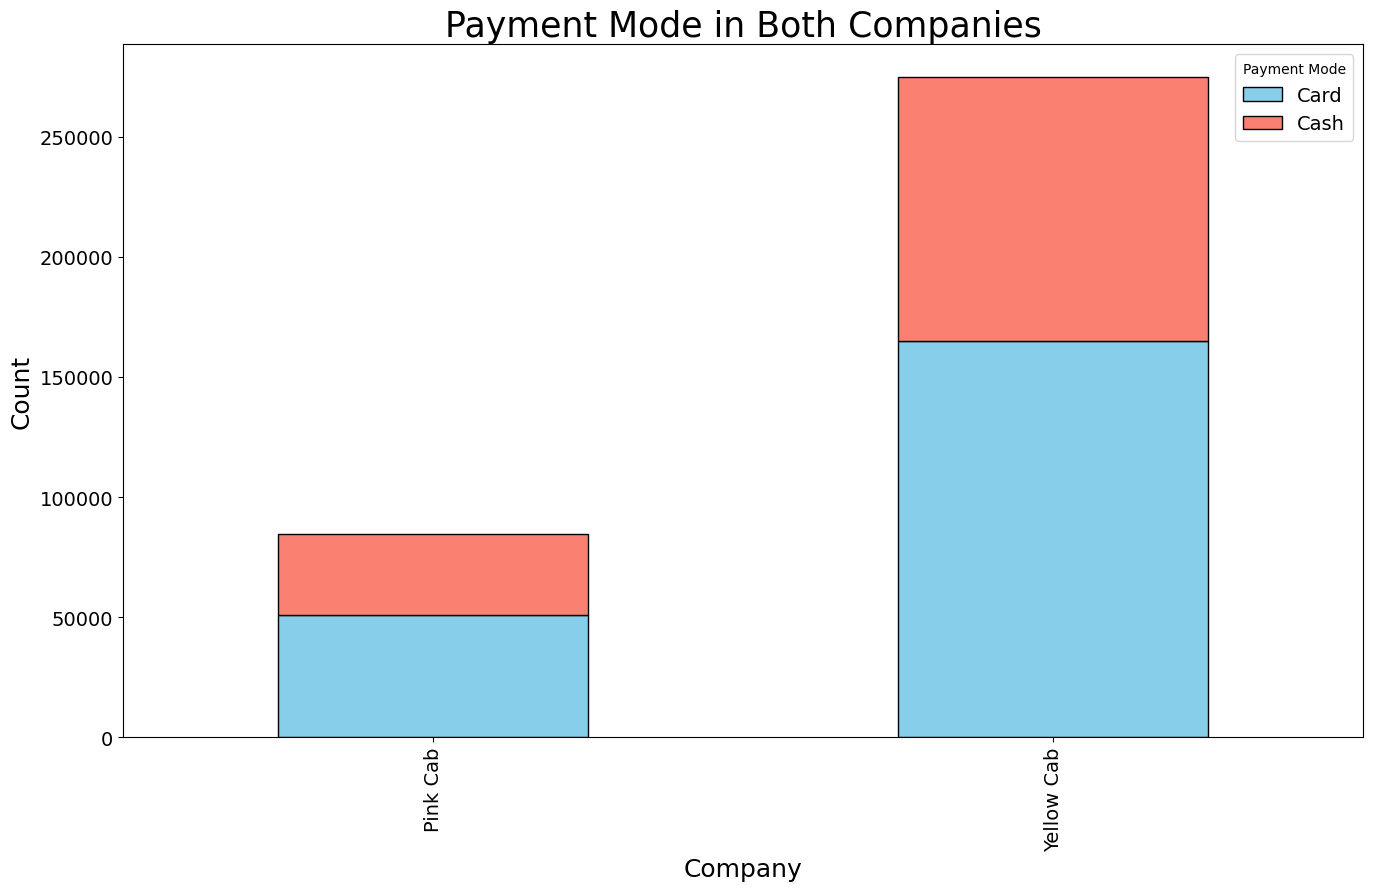

In [29]:
# Count the occurrences of each combination of Company and Payment Mode
payment_mode_counts = cab_trans_customer_city_df.groupby(['Company', 'Payment_Mode']).size().unstack()

# Plot the stacked bar plot
payment_mode_counts.plot(kind='bar', stacked=True, figsize=(16, 9), color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Payment Mode in Both Companies', fontsize=25)
plt.xlabel('Company', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Payment Mode', fontsize=14)
plt.show()

##Conclusion

#### For Yellow Cab, the number of card payments is almost double the number of cash payments. This indicates a strong preference for cashless transactions among Yellow Cab users.
#### For Pink Cab, the distribution is more even, suggesting that both payment modes are similarly popular among its users.

##KM Travlled Distribution

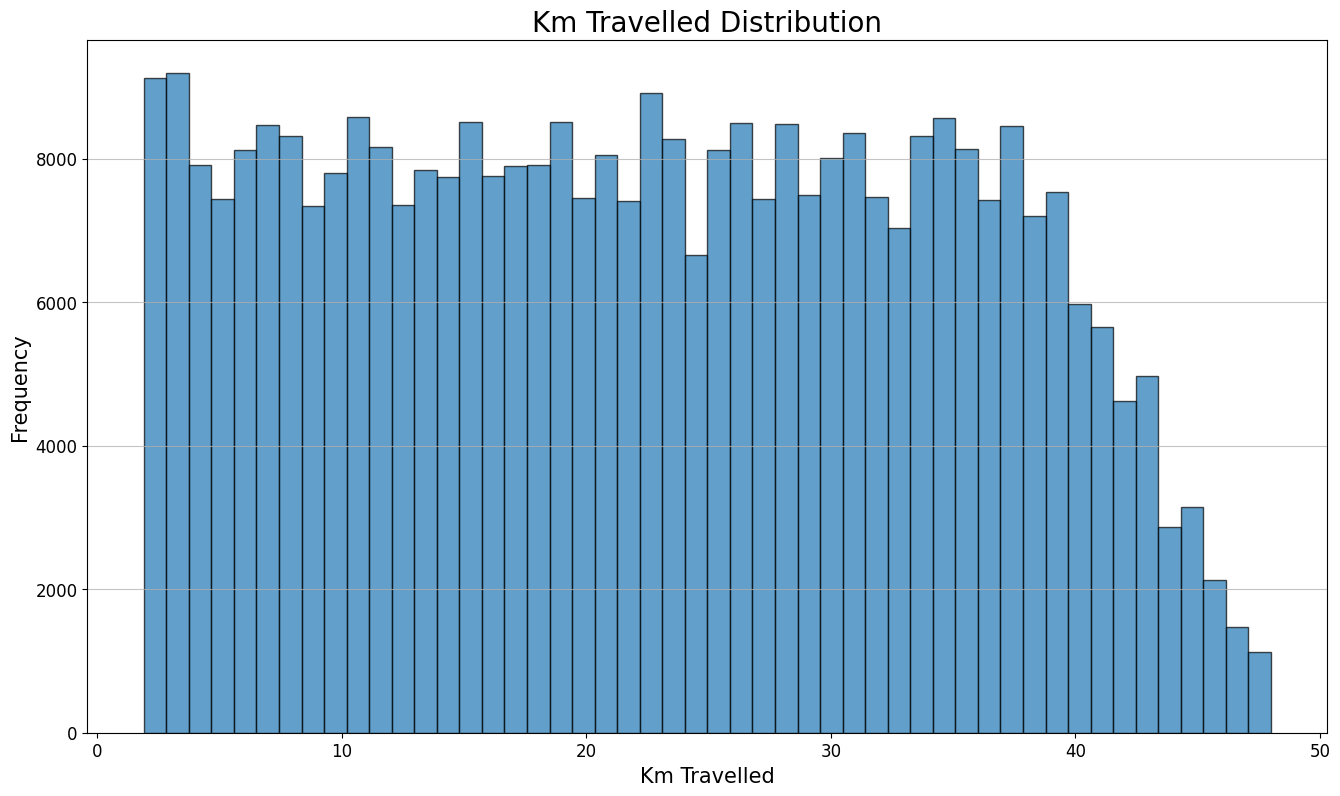

In [30]:
plt.figure(figsize=(16, 9))
plt.hist(cab_trans_customer_city_df['KM Travelled'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Km Travelled', fontsize=15)
plt.grid(axis='y', alpha=0.75)  # Adding grid lines on the y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Conclusion

####1. The highest frequencies are observed in the range of 0 to 10 kilometers, suggesting that short-distance trips are the most common.
####2. The histogram shows a relatively uniform distribution of trips up to around 30 kilometers, indicating a high frequency of short to mid-range trips.

## Price charged for Both Companies

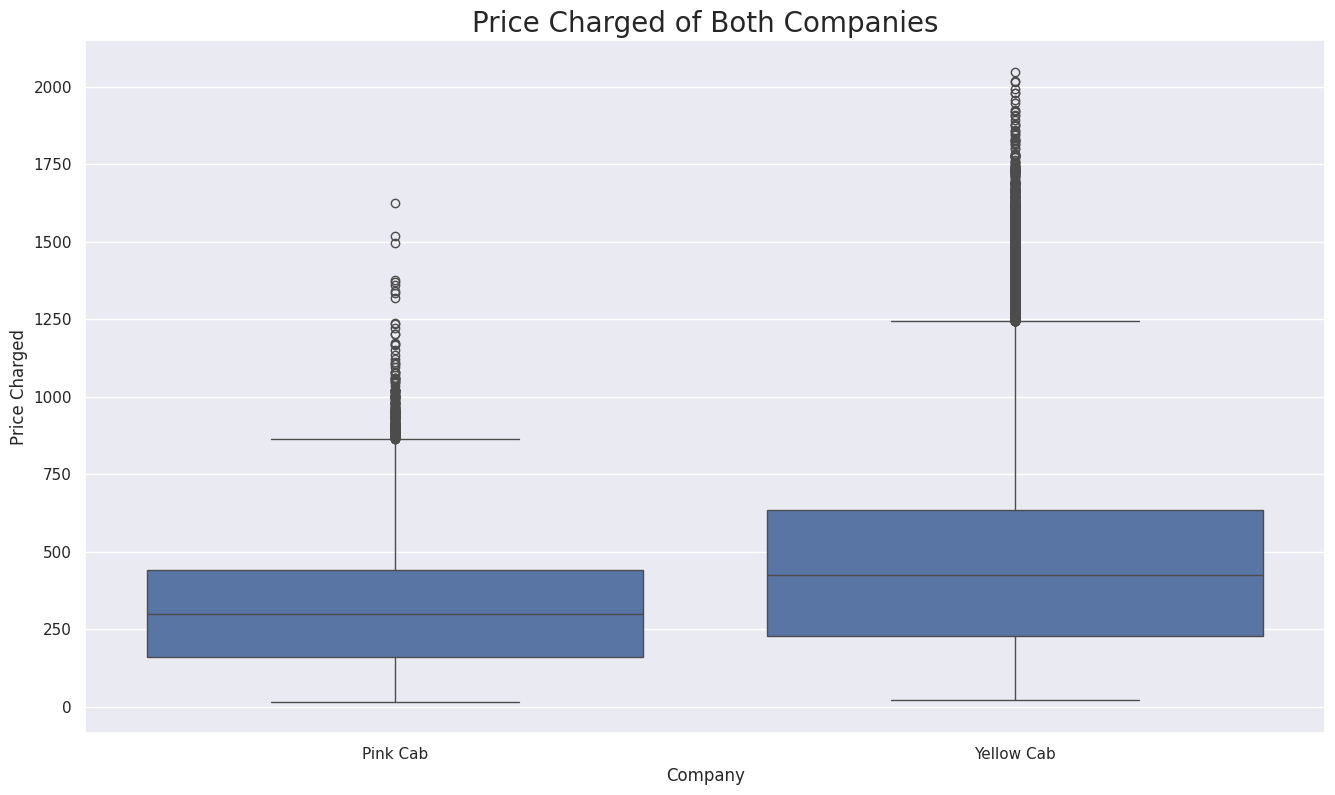

In [31]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(x='Company', y='Price Charged', data=cab_trans_customer_city_df)
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

##Conclusion
#### The price charged for Yellow cabs is higher than Pink Cabs.

## Price charged with respective of KM Travelled

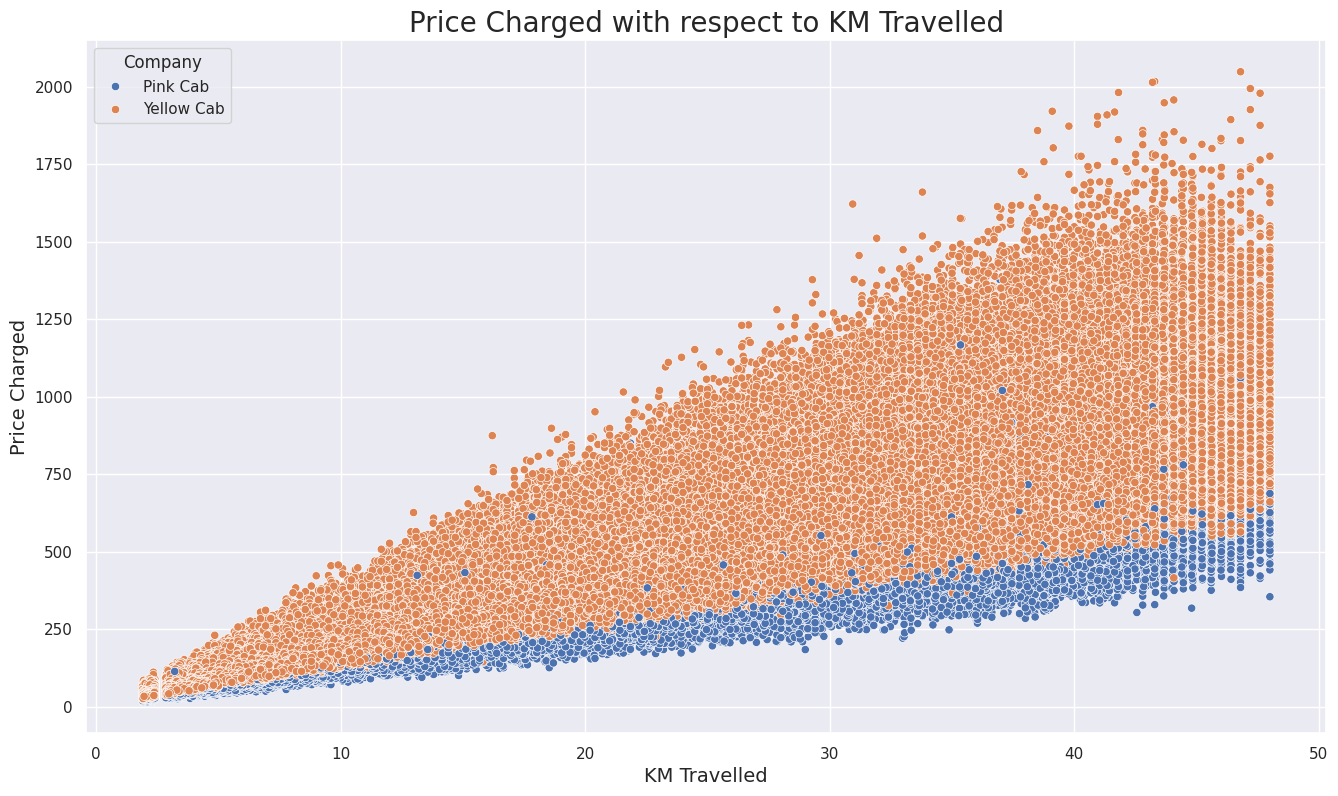

In [32]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=cab_trans_customer_city_df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged with respect to KM Travelled',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

##Conclusion

##Yellow Cab:
####The data points for Yellow Cab are consistently higher compared to Pink Cab for the same distances, indicating that Yellow Cab generally charges more for similar distances compared to Pink Cab.
##Pink Cab:
####The data points for Pink Cab are lower, showing that Pink Cab charges less for the same distance.

## Customers by Cab

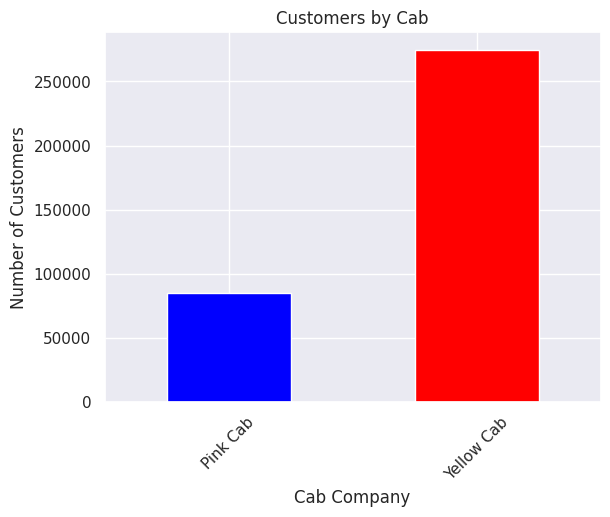

In [33]:
cab_trans_customer_city_df['Company'].value_counts(ascending=True).plot(kind='bar', color=['blue', 'red'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

## Percentage of Customers using cabs by Gender

In [34]:
gender_cab=cab_trans_customer_city_df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


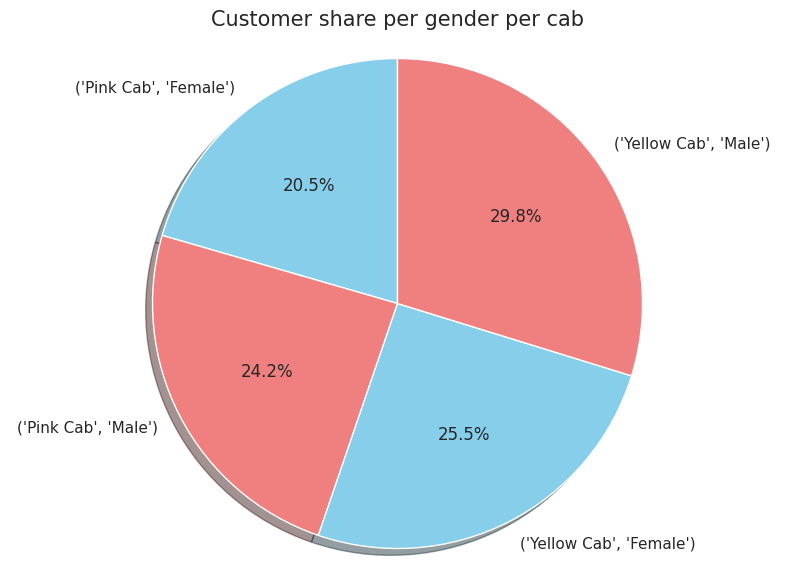

In [35]:
labels = gender_cab.index
values = gender_cab.values

# Define custom colors
colors = ['skyblue', 'lightcoral']

figp, axp = plt.subplots(figsize=(10, 7))
axp.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize=15)
plt.show()

##Conclusion

##Male Customers:
####Yellow Cab has a higher percentage of male customers (29.8%) compared to Pink Cab (24.2%).
##Female Customers:
####Yellow Cab also has a slightly higher percentage of female customers (25.5%) compared to Pink Cab (20.5%).

### Overall, Yellow Cab has a larger share of both male and female customers compared to Pink Cab.

## Users per City

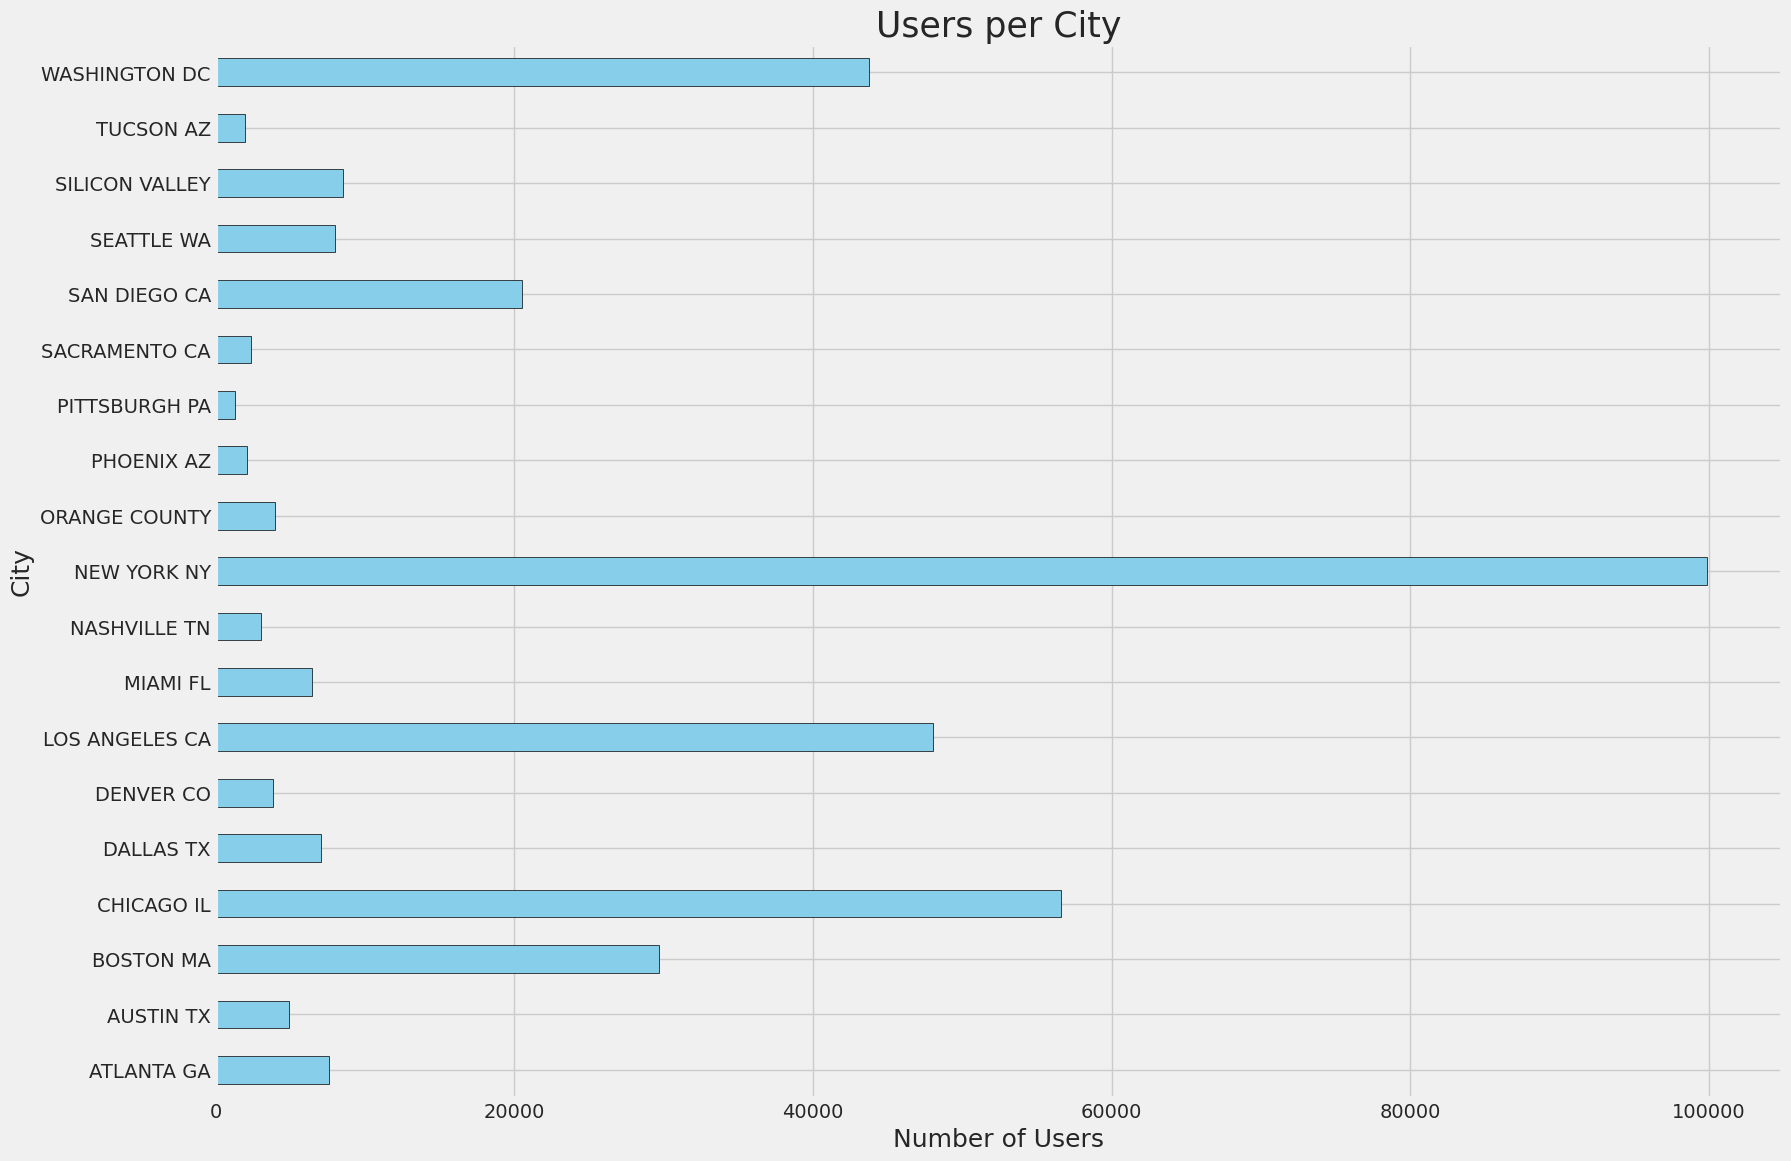

In [36]:
# Group by city and count the number of users
city_users = cab_trans_customer_city_df.groupby('City').Users.count()

# Plot a horizontal bar plot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(18, 13))

# Create the horizontal bar plot
city_users.plot(kind='barh', ax=ax, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Users per City', fontsize=25)
plt.xlabel('Number of Users', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

## Average Income of Users

<ipython-input-37-7c6b8160c7e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Income (USD/Month)', data=cab_trans_customer_city_df,


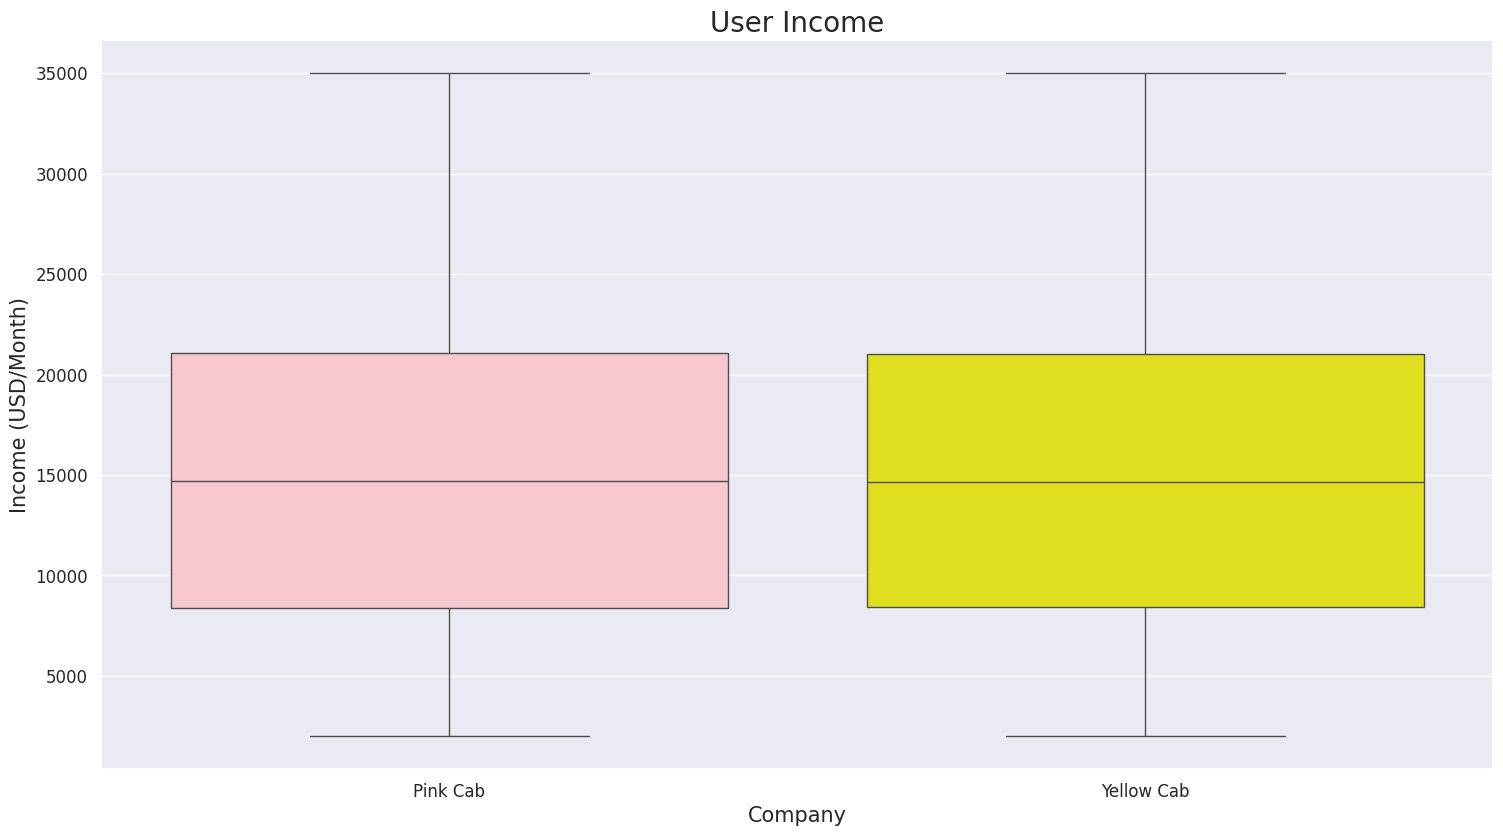

In [37]:
sns.set(style='darkgrid')

plt.figure(figsize=(16, 9))

# Use keyword arguments for x and y and set the palette for specific colors
sns.boxplot(x='Company', y='Income (USD/Month)', data=cab_trans_customer_city_df,
            palette={'Pink Cab': 'pink', 'Yellow Cab': 'yellow'})

plt.title('User Income', fontsize=20)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Income (USD/Month)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Conclusion

####1.The median income for users of both Pink Cab and Yellow Cab is around 15,000 USD/month. This is indicated by the line inside each box, representing the median
####2. Both Pink Cab and Yellow Cab have a similar IQR, ranging from approximately 10,000 to 20,000 USD/month. This suggests that the middle 50% of user incomes for both companies are comparable.

## Gross Profit Margin

In [38]:
company = cab_trans_customer_city_df.groupby('Company')
price_charged_by = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()

In [39]:
c_t = cost_trip.index
c_t_v = cost_trip.values
p_c = price_charged_by.values

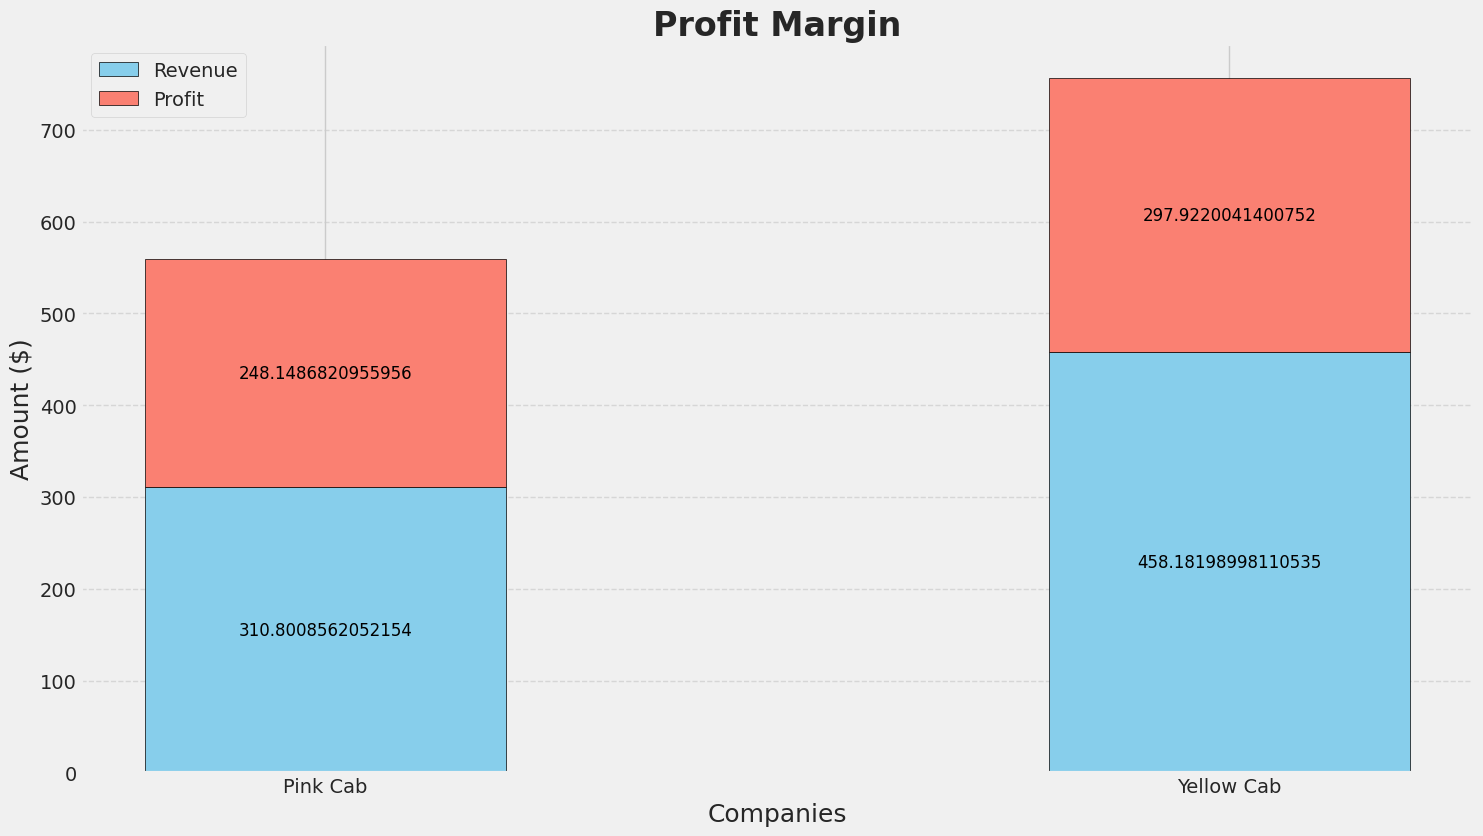

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 9))

# Plot bars with different colors and a bit of spacing
bar_width = 0.4
plt.bar(c_t, p_c, width=bar_width, color='skyblue', edgecolor='black', label="Revenue")
plt.bar(c_t, c_t_v, width=bar_width, color='salmon', edgecolor='black', label="Profit", bottom=p_c)

# Add data labels
for i in range(len(c_t)):
    plt.text(i, p_c[i] / 2, str(p_c[i]), ha='center', va='center', color='black', fontsize=12)
    plt.text(i, p_c[i] + c_t_v[i] / 2, str(c_t_v[i]), ha='center', va='center', color='black', fontsize=12)

plt.title('Profit Margin', fontsize=24, fontweight='bold')
plt.ylabel('Amount ($)', fontsize=18)
plt.xlabel('Companies', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##Conclusion
#### Yellow cabs has a higher profit margin compare to Pink Cab

## Profit per Year

In [41]:
cab_trans_customer_city_df['Year'].value_counts()

Year
2017    128196
2018    122721
2016    108294
2015       181
Name: count, dtype: int64

In [42]:
pink_cab_profit=cab_trans_customer_city_df[cab_trans_customer_city_df.Company=='Pink Cab'].groupby(cab_trans_customer_city_df['Year']).Profit.mean()
yellow_cab_profit=cab_trans_customer_city_df[cab_trans_customer_city_df.Company=='Yellow Cab'].groupby('Year').Profit.mean()
print("Pink Cab Profit:\n", pink_cab_profit)
print("\n____________________________________")
print("\nYellow Cab Profit:\n", yellow_cab_profit)

Pink Cab Profit:
 Year
2015    117.302951
2016     68.816389
2017     66.633717
2018     53.068422
Name: Profit, dtype: float64

____________________________________

Yellow Cab Profit:
 Year
2015    323.540294
2016    169.417488
2017    168.299775
2018    143.491148
Name: Profit, dtype: float64


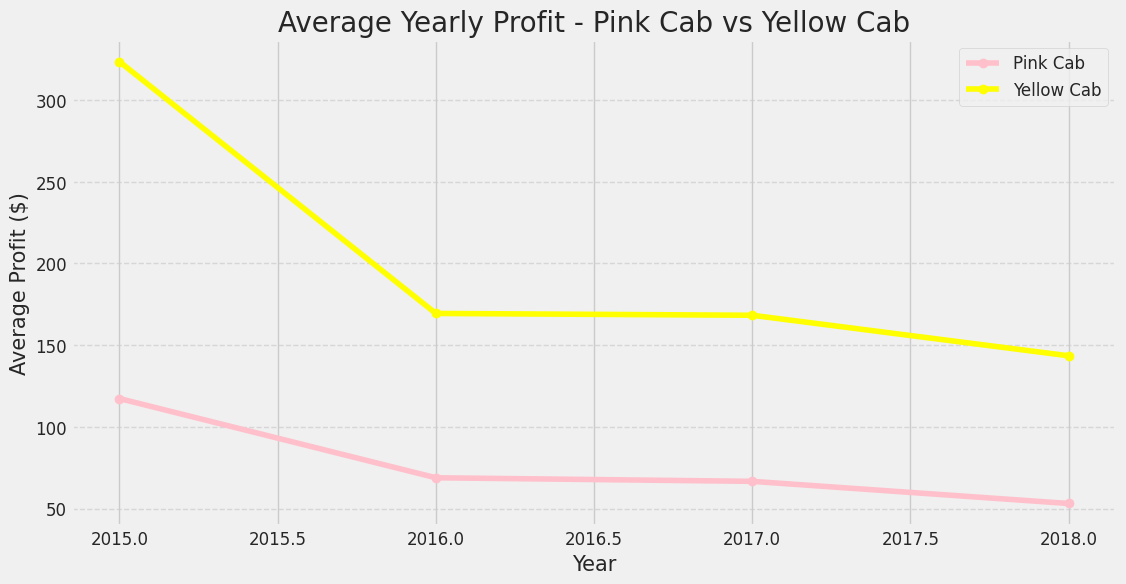

In [43]:
# Plot the data using a line plot
plt.figure(figsize=(12, 6))
plt.plot(pink_cab_profit.index, pink_cab_profit.values, marker='o', linestyle='-', color='pink', label='Pink Cab')
plt.plot(yellow_cab_profit.index, yellow_cab_profit.values, marker='o', linestyle='-', color='yellow', label='Yellow Cab')

plt.title('Average Yearly Profit - Pink Cab vs Yellow Cab', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Profit ($)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Conclusion

#### Both Yellow cabs and Pink cabs are gradually decreased year by year from 2016

## Hypothesis Testing

####1. Anything makes a difference in profit regarding payment mode
####H0= There is no difference regarding Payment_Mode in both cab companies.
####H1= There is a difference regarding Payment_Mode in both cab companies.


#Pink Cab

In [45]:
import scipy.stats as stats # Import the stats module

# Group by Transaction ID and calculate the mean profit for each payment mode
cash_method = cab_trans_customer_city_df[(cab_trans_customer_city_df['Payment_Mode'] == 'Cash') &
                               (cab_trans_customer_city_df['Company'] == 'Pink Cab')].groupby('Transaction ID')['Profit'].mean()
card_method = cab_trans_customer_city_df[(cab_trans_customer_city_df['Payment_Mode'] == 'Card') &
                               (cab_trans_customer_city_df['Company'] == 'Pink Cab')].groupby('Transaction ID')['Profit'].mean()

# Perform t-test
t_stat, p_value = stats.ttest_ind(cash_method.values, card_method.values, equal_var=True) # Call ttest_ind from the stats module

print('P value is ', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('Accept the  null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793286
Accept the  null hypothesis (H0) that there is no difference in payment mode for Pink Cab


#Yellow Cab

In [46]:
cash_method = cab_trans_customer_city_df[(cab_trans_customer_city_df['Payment_Mode']=='Cash')&(cab_trans_customer_city_df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
card_method = cab_trans_customer_city_df[(cab_trans_customer_city_df['Payment_Mode']=='Card')&(cab_trans_customer_city_df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(cash_method.values,
                             card_method.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('Accept the null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
Accept the null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


##Conclusion:
####There is no difference in a payment mode for both comapnies

## Chi-Square Test for Proportions (Gender by Company):


In [47]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(cab_trans_customer_city_df['Company'], cab_trans_customer_city_df['Gender'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('P value is ', p)

if p < 0.05:
    print('Reject the null hypothesis (H1) that there is a difference in gender distribution between companies')
else:
    print('Accept the null hypothesis (H0) that there is no difference in gender distribution between companies')

P value is  3.982674650131372e-25
Reject the null hypothesis (H1) that there is a difference in gender distribution between companies


##Correlation Test (KM Travelled vs. Price Charged):

In [48]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
corr, p_value = pearsonr(cab_trans_customer_city_df['KM Travelled'], cab_trans_customer_city_df['Price Charged'])

print('P value is ', p_value)
print('Correlation coefficient is ', corr)

if p_value < 0.05:
    print('Reject the null hypothesis (H1) that there is a significant correlation between KM Travelled and Price Charged')
else:
    print('Accept the null hypothesis (H0) that there is no significant correlation between KM Travelled and Price Charged')

P value is  0.0
Correlation coefficient is  0.8357531580209414
Reject the null hypothesis (H1) that there is a significant correlation between KM Travelled and Price Charged
